<a href="https://colab.research.google.com/github/SLVmain/Neural_Networks_practice/blob/main/NN_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

# Распознавание рукописных цифр

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train_org[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

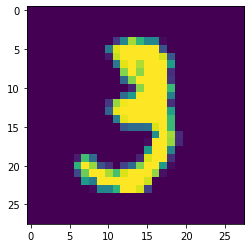

In [5]:
n = 10 #Номер картинки
plt.imshow(x_train_org[n], cmap='viridis') #Отрисовка картинки
plt.show() # Вывод картинки

In [6]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [7]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [8]:
y_train_org[0]

5

In [9]:
utils.to_categorical(y_train_org[0], 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [11]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [12]:
print(y_train[n]) #Выводим пример одного выходного вектора

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [13]:
print(y_train_org.shape)

(60000,)


In [14]:
print(y_train_org[36])

6


In [15]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 5s 7ms/step - loss: 0.2341 - accuracy: 0.9311 - val_loss: 0.1171 - val_accuracy: 0.9661
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0844 - accuracy: 0.9743 - val_loss: 0.0921 - val_accuracy: 0.9724
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0519 - accuracy: 0.9831 - val_loss: 0.0992 - val_accuracy: 0.9719
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0821 - val_accuracy: 0.9762
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0814 - val_accuracy: 0.9772
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0852 - val_accuracy: 0.9770
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0192 - accuracy: 0.9932 - val_loss: 0.1058 - val_accuracy: 0.9750
Epoch 

In [18]:
model.save_weights('model.h5')
model.load_weights('model.h5')

## Распознавание рукописных цифр




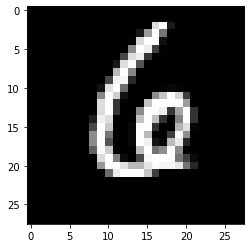

In [25]:
n_rec = 123 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [26]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [27]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [28]:
prediction = model.predict(x) #Распознаём наш пример

In [29]:
print(prediction) #Выводим результат, это 10 цифр

[[3.1150267e-12 2.5688941e-08 1.2967399e-15 3.5868507e-16 3.6393268e-13
  5.4700365e-08 1.0000000e+00 5.6460252e-14 5.1145029e-11 1.8984050e-15]]


In [30]:
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction)

6


In [31]:
print(y_test_org[n_rec]) #выводим правильный ответ, для сравнения

6


Распознайте рукописную цифру, созданную вами с помощью графического редактора (например,
Paint).
Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Collaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’)
загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.
Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать
дополнительную предобработку изображения).

In [33]:
image_tt = image.load_img('4_.png', target_size=(28, 28), color_mode = 'grayscale')

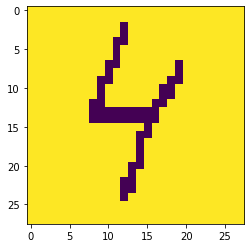

In [34]:
plt.imshow(image_tt, cmap='viridis') #Отрисовка картинки
plt.show() # Вывод картинки

In [35]:
 image_tt = image.img_to_array(image_tt)

In [37]:
#Меняем формат входных картинок с 28х28 на 784х1
image_tt_r = image_tt.reshape(784)
image_tt_r

array([255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255.,   0., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255.,   0., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255.,   0.,   0., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 25

In [38]:
#example = image.img_to_array(example) # преобразуем изображение в numpy-массив
example = image_tt_r.reshape(1,784)
#example = example.astype('float32')
example = 1- example/255

In [40]:
pred_example = model.predict(example)
print(pred_example)

[[7.3861514e-11 1.0482216e-09 1.3870019e-07 7.2843108e-08 9.9909019e-01
  5.6098124e-06 1.0742484e-06 6.7686223e-08 9.0264832e-04 7.8908933e-08]]


In [41]:
pred = np.argmax(pred_example)
print(pred)

4


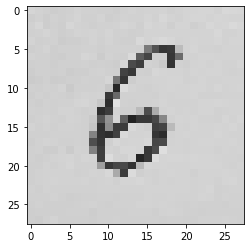

In [42]:
# Загружаем картинку нарисованную на листе бумаги
example = image.load_img('/content/6_.png', target_size=(28, 28), color_mode = 'grayscale') 

# Нарисуем картинку
plt.imshow(example.convert('RGBA')) 
plt.show()

In [43]:
example = image.img_to_array(example)
example = example.reshape(1,784)
print(example)

[[213. 210. 208. 205. 207. 208. 211. 209. 209. 208. 208. 206. 209. 211.
  209. 210. 210. 211. 208. 210. 212. 212. 213. 213. 210. 216. 215. 214.
  206. 209. 205. 209. 207. 209. 212. 208. 208. 211. 206. 208. 210. 209.
  209. 212. 209. 215. 211. 209. 212. 213. 213. 211. 213. 212. 211. 211.
  209. 214. 205. 208. 206. 214. 210. 209. 207. 209. 209. 210. 213. 211.
  207. 214. 211. 212. 207. 212. 212. 207. 210. 215. 212. 213. 217. 214.
  208. 209. 212. 209. 206. 208. 211. 210. 211. 209. 212. 208. 209. 207.
  208. 211. 211. 211. 211. 211. 211. 211. 211. 211. 215. 210. 210. 212.
  211. 207. 208. 209. 204. 206. 206. 208. 211. 208. 211. 208. 207. 207.
  216. 211. 214. 217. 214. 210. 211. 212. 211. 211. 213. 210. 212. 212.
  206. 208. 211. 206. 208. 208. 208. 209. 209. 207. 209. 209. 209. 209.
  208. 122.  83.  55.  59. 188. 211. 213. 210. 210. 209. 211. 211. 211.
  210. 208. 208. 206. 205. 208. 208. 213. 211. 204. 210. 208. 207. 217.
   92.  68. 209. 209.  55. 107. 210. 210. 212. 212. 211. 211. 21

In [46]:
example = np.where(example > 120, 255, example) # По условию меняем значения в масиве
example

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 

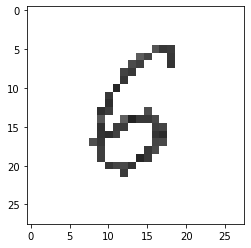

In [47]:
plt.imshow(Image.fromarray(example.reshape(28,28)).convert('RGBA')) # Нарисуем картинку после обработки
plt.show()

In [48]:
# Нормализуем данные
example = example.astype('float32')
example = 1 - example/255 # Делаем инверсию, чтобы было не черное на белом, а белая цифра на черном фоне

In [49]:
pred_example = model.predict(example)
pred_example

array([[1.12708294e-05, 1.03558804e-07, 4.95706117e-05, 5.52767476e-09,
        4.16925474e-07, 4.31889857e-05, 9.99748051e-01, 1.49907609e-09,
        1.46016464e-04, 1.35494543e-06]], dtype=float32)

In [50]:
pred = np.argmax(pred_example)
pred

6